In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('StudentsPerformance.csv')

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.shape

(1000, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# visualising the number of male and female in the dataset

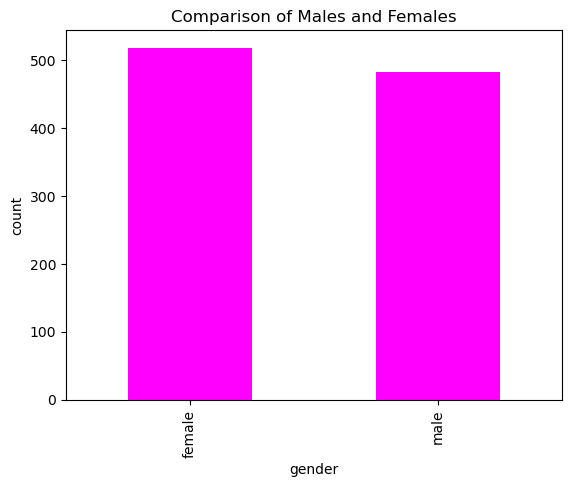

In [23]:
df['gender'].value_counts(normalize = True)
df['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()
     

# visualizing the different groups in the dataset

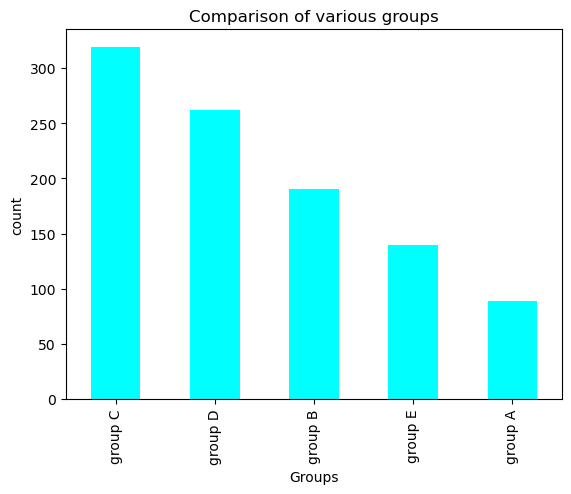

In [24]:
df['race/ethnicity'].value_counts(normalize = True)
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [25]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

# visualizing the differnt parental education levels

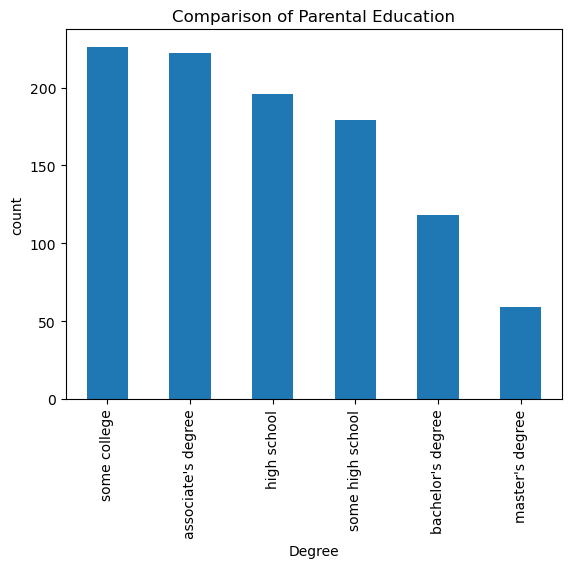

In [26]:
df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# visualizing different types of lunch 

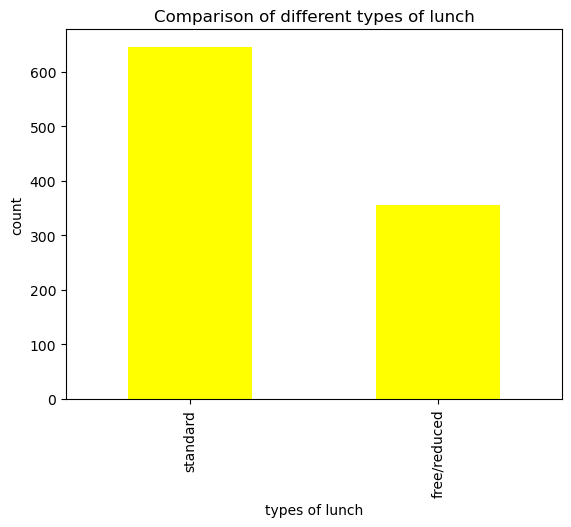

In [27]:
df['lunch'].value_counts(normalize = True)
df['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# visualizing maths score

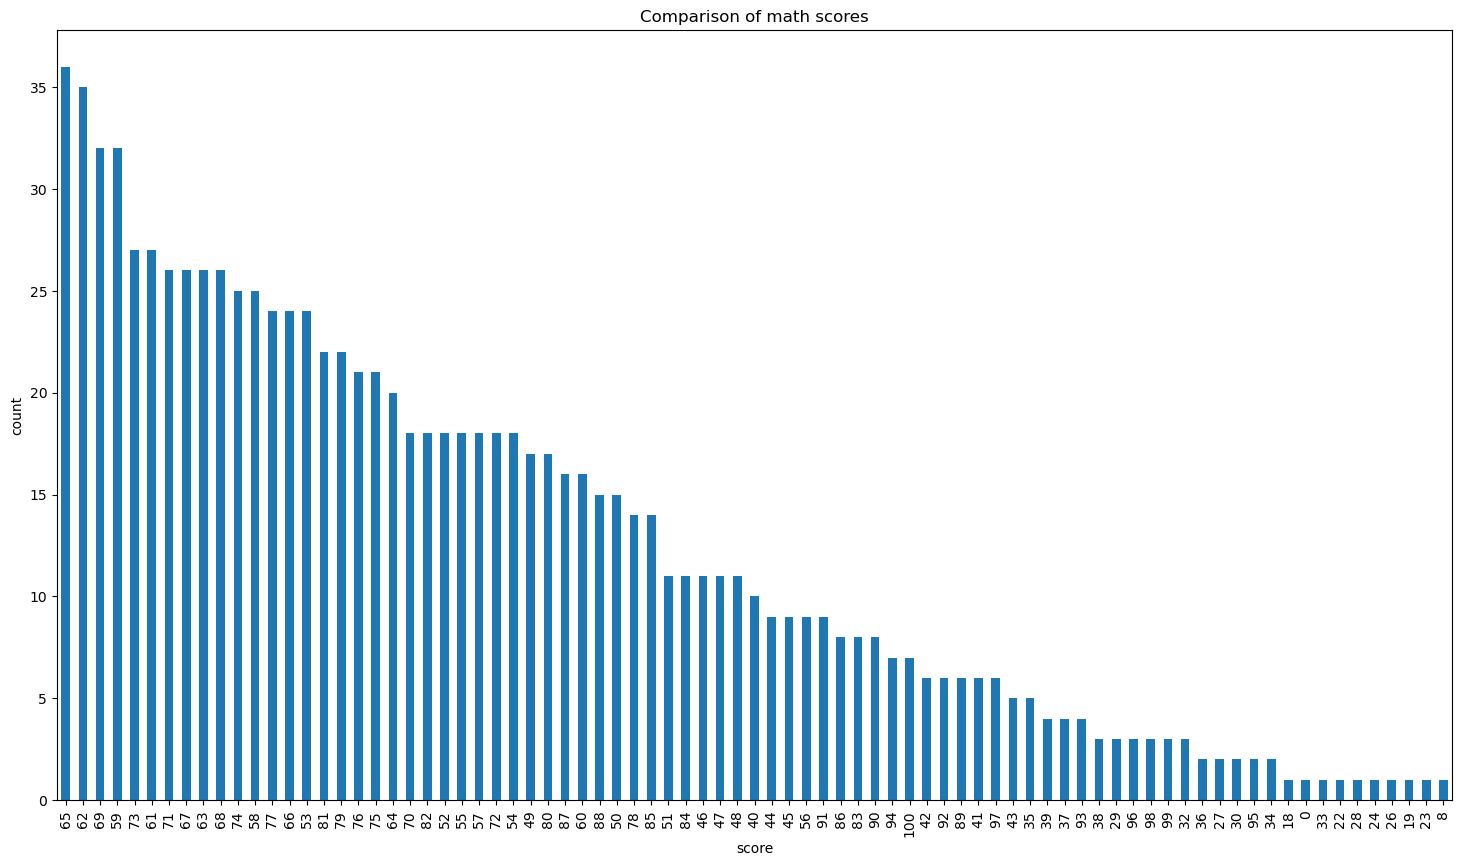

In [28]:
df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

# visualizing reading score score

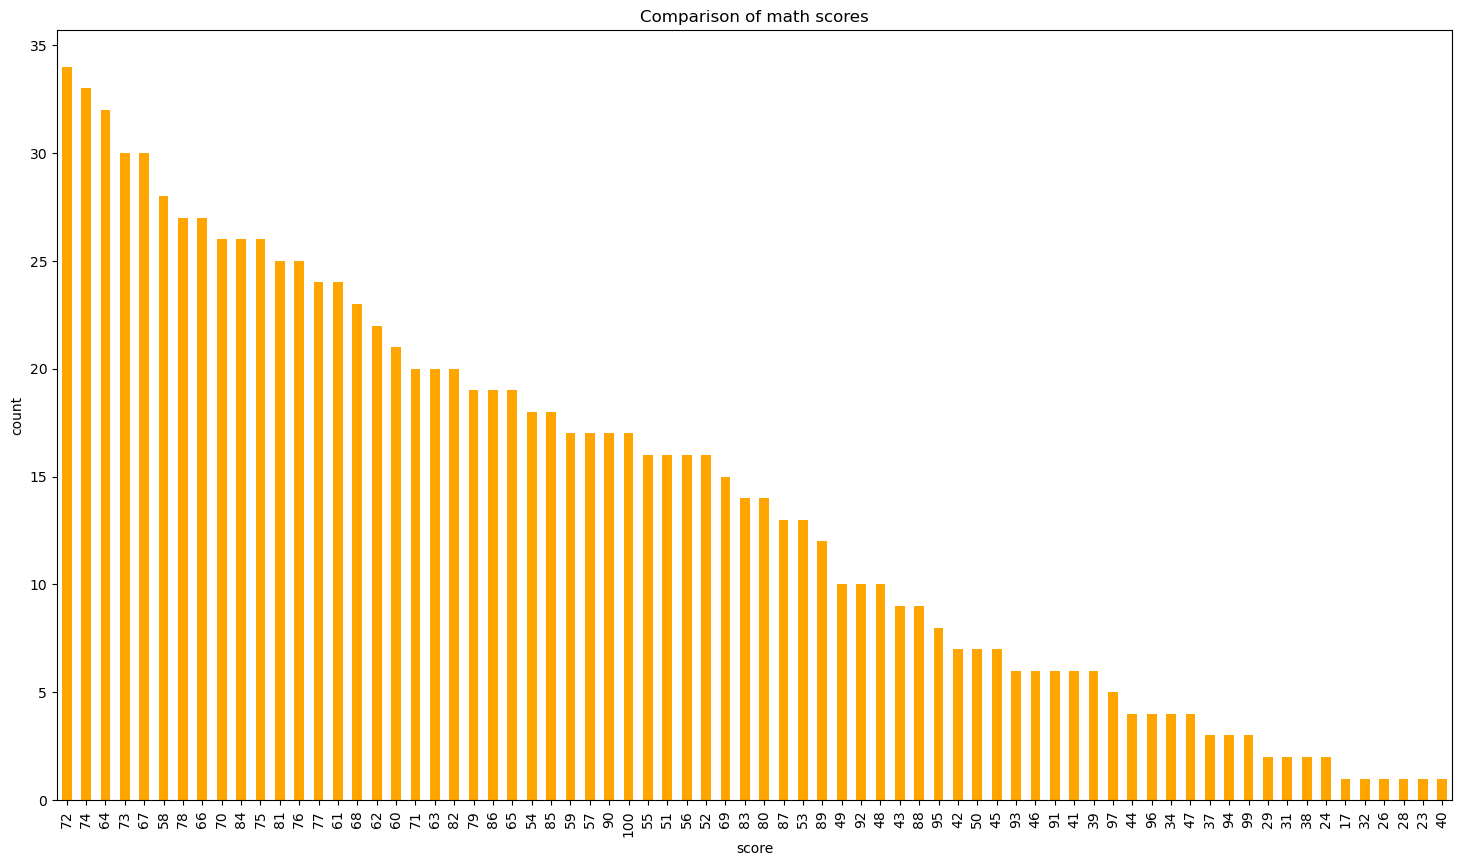

In [29]:
df['reading score'].value_counts(normalize = True)
df['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()
     

# visualizing writing score

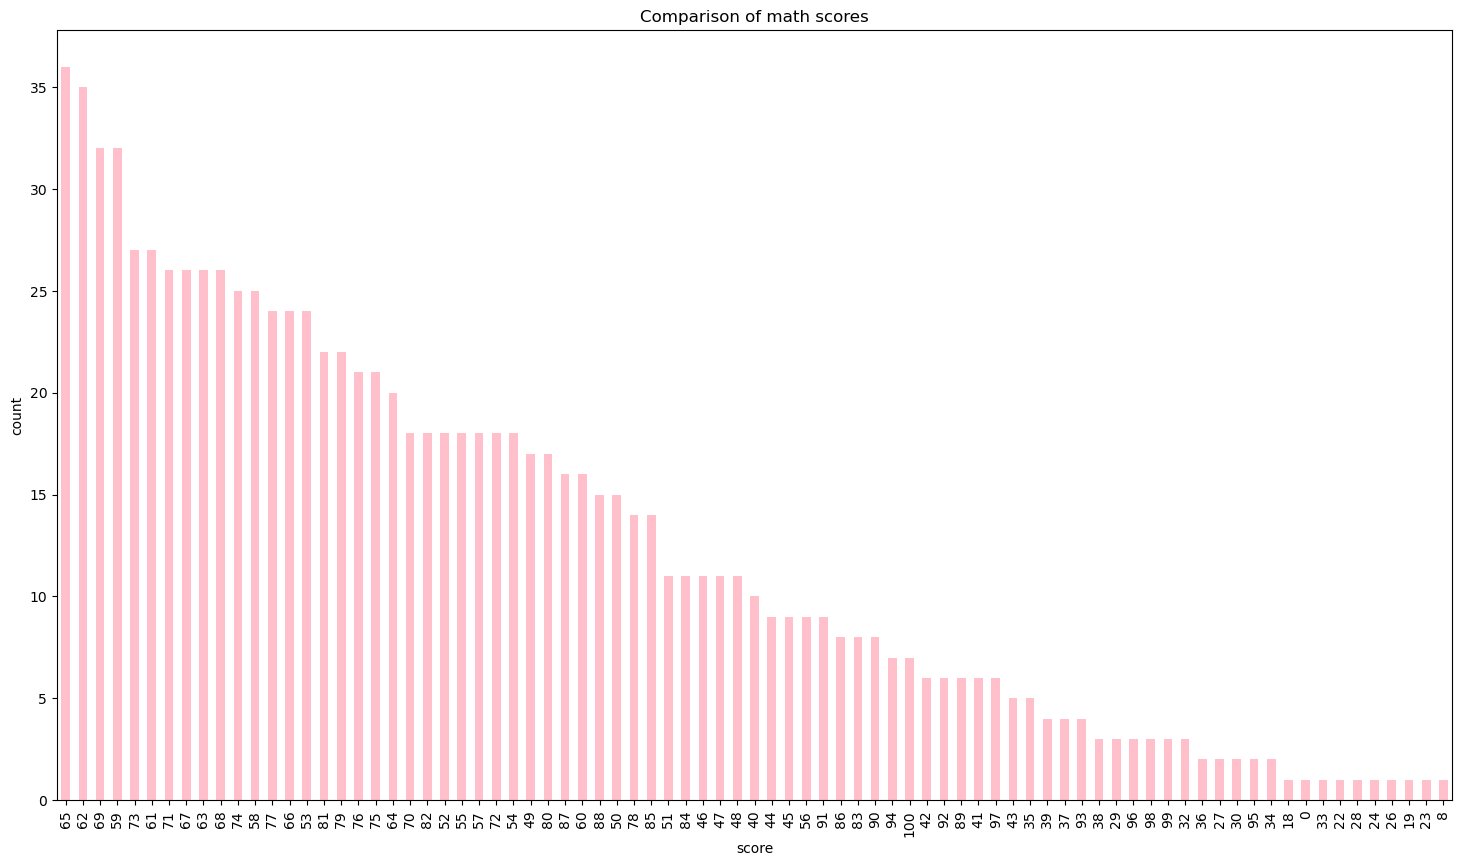

In [30]:
df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

# gender vs race/etnicity 

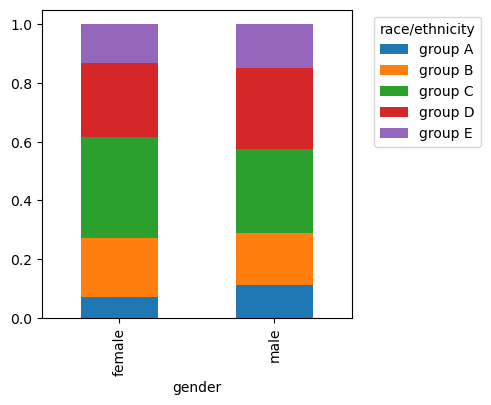

In [31]:
x = pd.crosstab(df['gender'], df['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.legend(title='race/ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# comparison of race/ethnicity and parental level of education

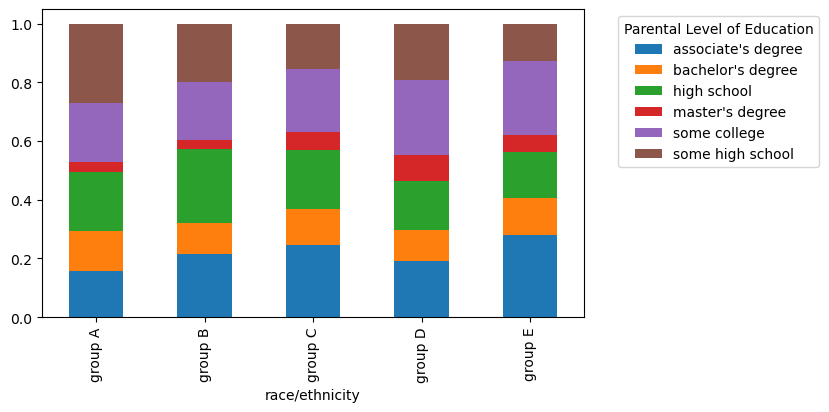

In [32]:
x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (7, 4) )
plt.legend(title='Parental Level of Education', bbox_to_anchor=(1.05, 1), loc='upper left')


# comparison of parental degree and test course

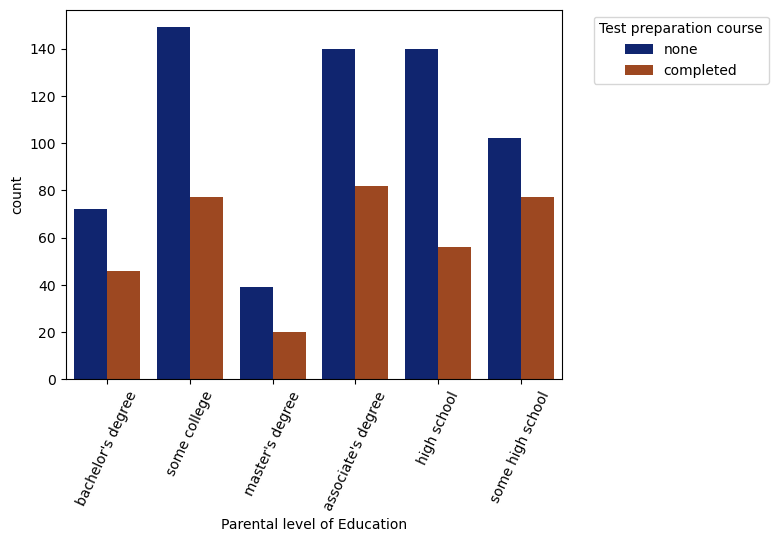

In [33]:
sns.countplot(x = 'parental level of education', data = df, hue = 'test preparation course', palette = 'dark')
plt.legend(title='Test preparation course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Parental level of Education')
plt.xticks(rotation=65)
plt.show()

     

# comparison of race/ethnicity and test preparation course

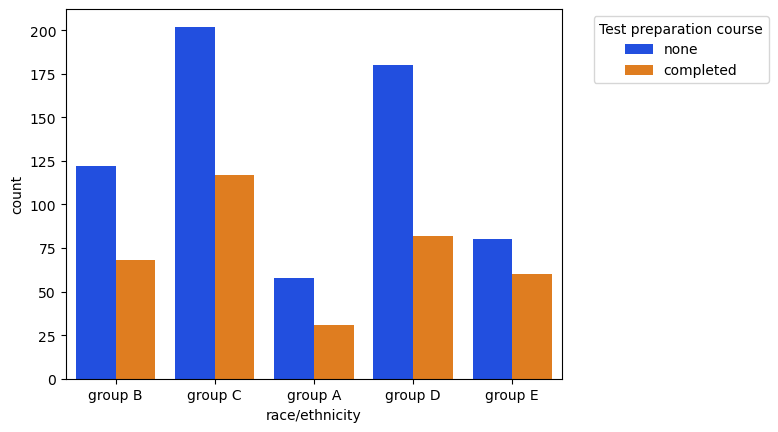

In [34]:
sns.countplot(x = 'race/ethnicity', data = df,  hue = 'test preparation course', palette = 'bright')
plt.legend(title='Test preparation course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

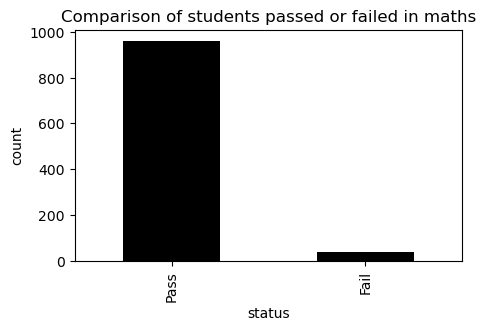

In [35]:

# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [36]:

df['pass_math'].value_counts()

pass_math
Pass    960
Fail     40
Name: count, dtype: int64

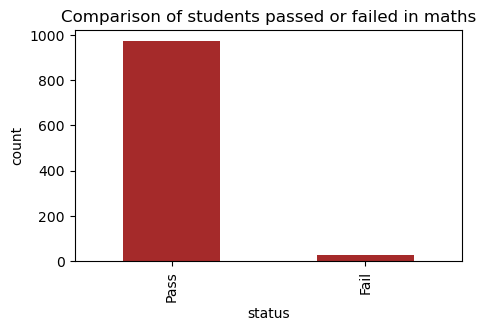

In [37]:

# creating a new column pass_reading, this column will tell us whether the students are pass or fail
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [106]:
df['pass_reading'].value_counts()

pass_reading
Pass    974
Fail     26
Name: count, dtype: int64

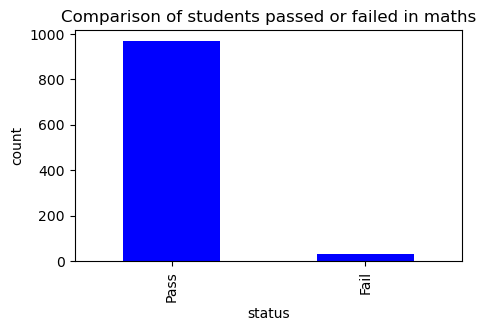

In [38]:

# creating a new column pass_writing, this column will tell us whether the students are pass or fail
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [39]:
df['pass_writing'].value_counts()

pass_writing
Pass    968
Fail     32
Name: count, dtype: int64

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


# computing the total score for each student

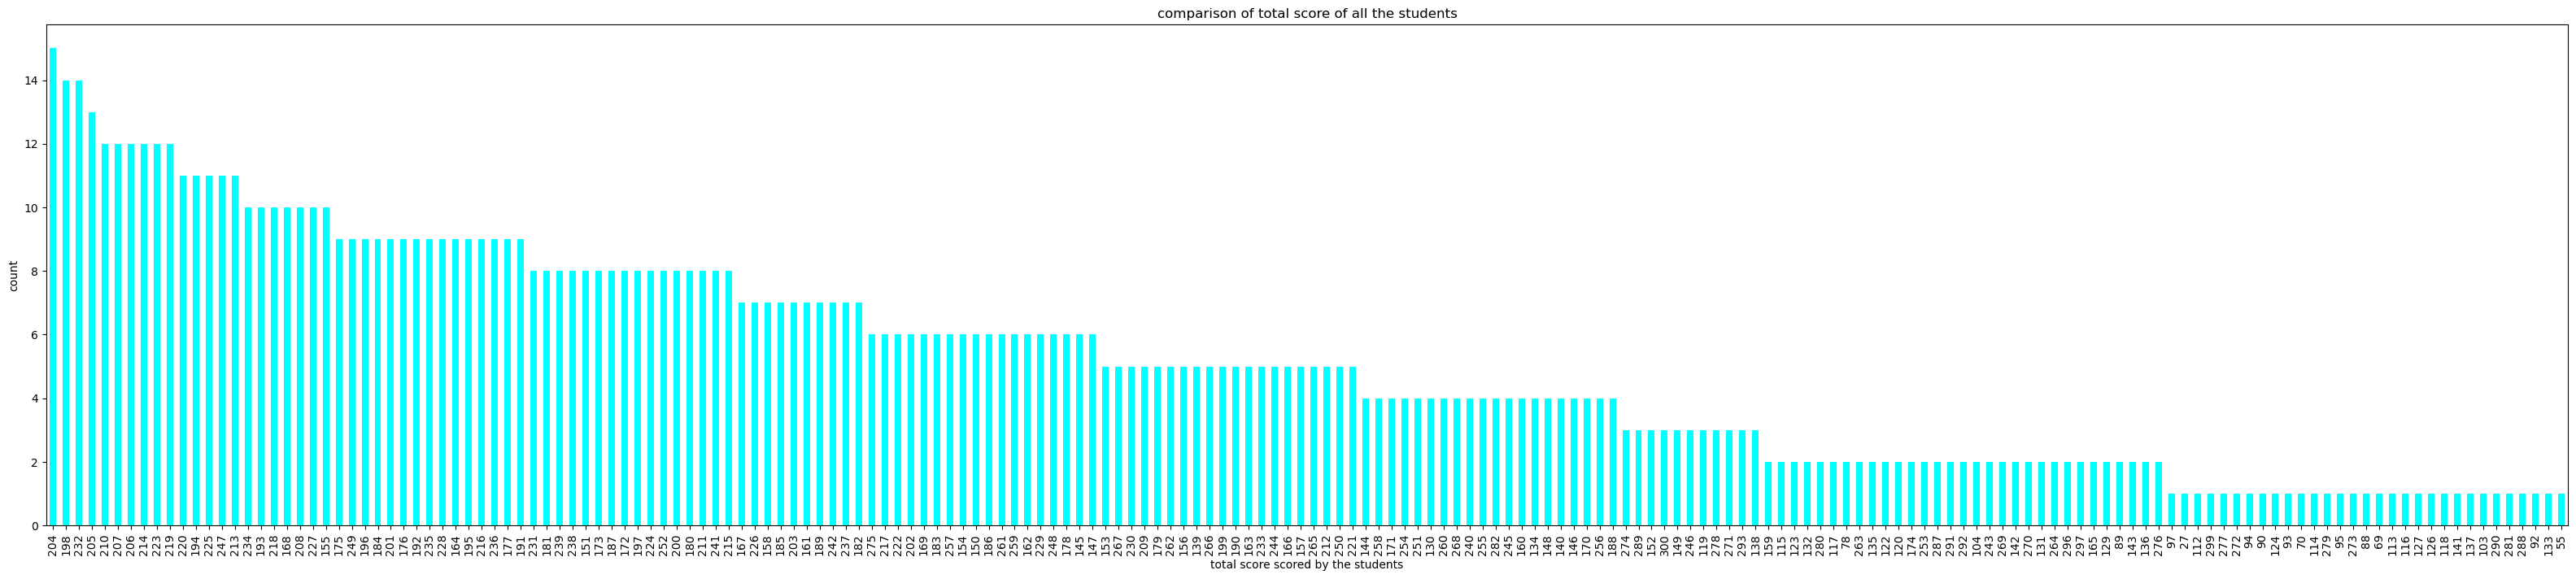

In [41]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['total_score'].value_counts(normalize = True)
df['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

# computing percentage for each of the students
# importing math library to use ceil

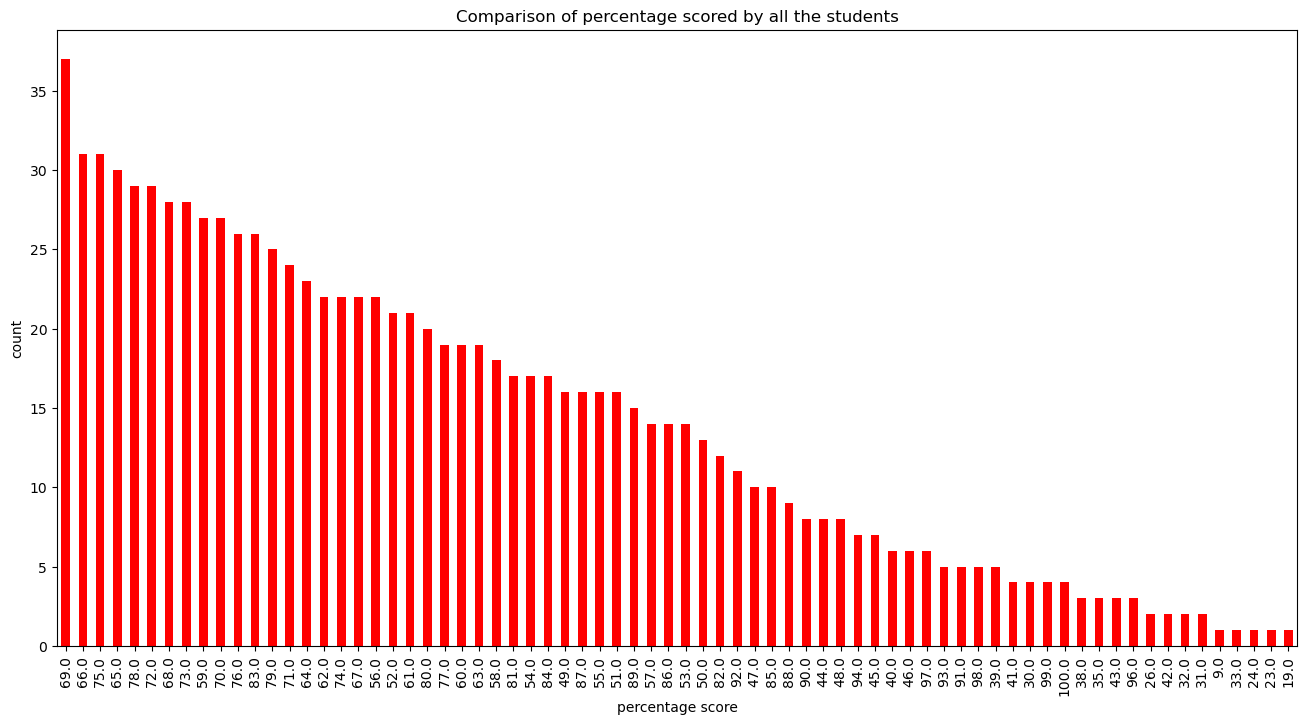

In [42]:

import warnings
warnings.filterwarnings("ignore")
from math import * 

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
  df['percentage'][i] = ceil(df['percentage'][i])

df['percentage'].value_counts(normalize = True)
df['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

# checking which student is fail overall

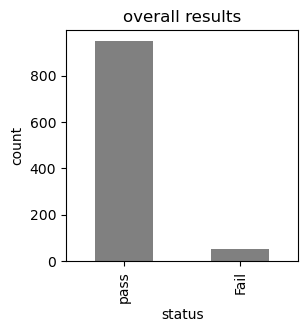

In [43]:
df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [44]:
df['status'].value_counts()

status
pass    949
Fail     51
Name: count, dtype: int64

# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

In [45]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

grades
B    260
C    252
D    223
A    156
O     58
E     51
Name: count, dtype: int64

# plotting a pie chart for the distribution of various grades amongst the students

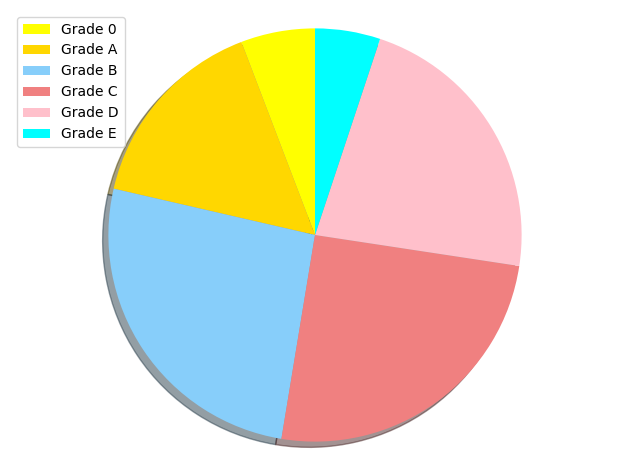

In [46]:
labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()
     

# comparison parent's degree and their corresponding grades

<Axes: xlabel='parental level of education'>

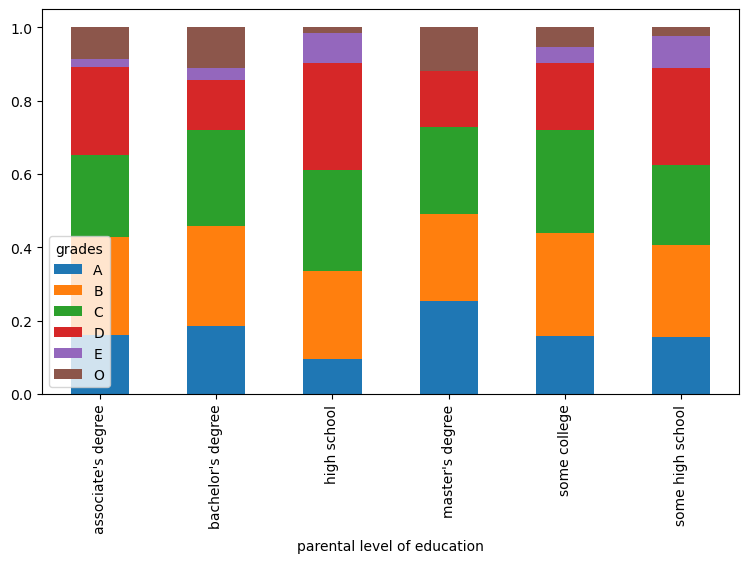

In [47]:
x = pd.crosstab(df['parental level of education'], df['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9, 5))

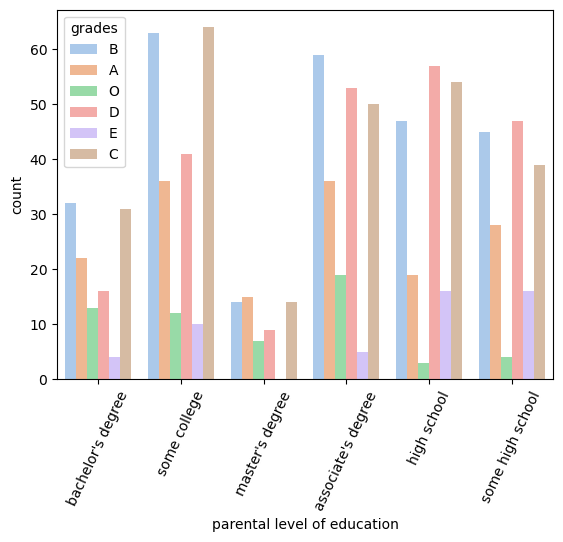

In [49]:
# for better visualization we will plot it again using seaborn
sns.countplot(x = df['parental level of education'], data = df, hue = df['grades'], palette = 'pastel')
plt.xticks(rotation=65)
plt.show()

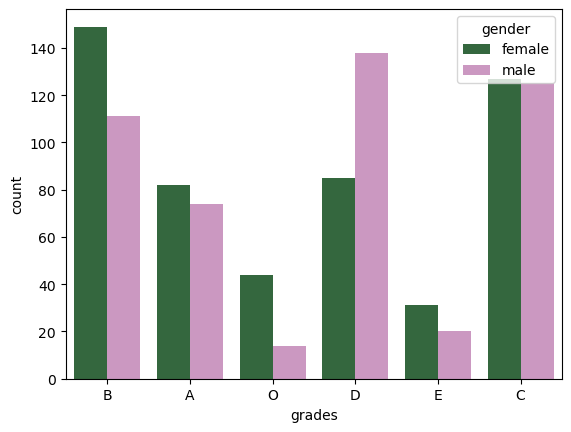

In [50]:
# comparing the distribution of grades among males and females
sns.countplot(x = df['grades'], data = df, hue = df['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,pass,B


In [52]:
df.describe()

,math score,reading score,writing score,total_score,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,68.105000
std,15.16308,14.600192,15.195657,42.771978,14.258095
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,59.000000
50%,66.00000,70.000000,69.000000,205.000000,69.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [53]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['test preparation course'].value_counts()

test preparation course
1    642
0    358
Name: count, dtype: int64

In [54]:

# label encoding for lunch

df['lunch'] = le.fit_transform(df['lunch'])
df['lunch'].value_counts()

lunch
1    645
0    355
Name: count, dtype: int64

In [55]:
# label encoding for race/ethnicity
# we have to map values to each of the categories

df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

df['race/ethnicity'].value_counts()

race/ethnicity
3    319
4    262
2    190
5    140
1     89
Name: count, dtype: int64

In [56]:
# label encoding for parental level of education

df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['parental level of education'].value_counts()

parental level of education
4    226
0    222
2    196
5    179
1    118
3     59
Name: count, dtype: int64

In [57]:
# label encoding for gender
df['gender'] = le.fit_transform(df['gender'])
df['gender'].value_counts()

gender
0    518
1    482
Name: count, dtype: int64

In [58]:
# label encoding for pass_math

df['pass_math'] = le.fit_transform(df['pass_math'])
df['pass_math'].value_counts()

pass_math
1    960
0     40
Name: count, dtype: int64

In [59]:
# label encoding for pass_reading

df['pass_reading'] = le.fit_transform(df['pass_reading'])
df['pass_reading'].value_counts()

pass_reading
1    974
0     26
Name: count, dtype: int64

In [60]:

# label encoding for pass_writing

df['pass_writing'] = le.fit_transform(df['pass_writing'])
df['pass_writing'].value_counts()

pass_writing
1    968
0     32
Name: count, dtype: int64

In [61]:
# label encoding for status

df['status'] = le.fit_transform(df['status'])
df['status'].value_counts()
     

status
1    949
0     51
Name: count, dtype: int64

In [62]:

# label encoding for grades
# we have to map values to each of the categories

df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)

df['race/ethnicity'].value_counts()

race/ethnicity
3    319
4    262
2    190
5    140
1     89
Name: count, dtype: int64

In [63]:
df.shape

(1000, 15)

In [64]:

# splitting the dependent and independent variables

x = df.iloc[:,:14]
y = df.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [65]:

# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [66]:

# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [67]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

 <b> Modeling
 <b> Logistic regression

In [68]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8506666666666667
Testing Accuracy : 0.816


In [69]:

# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 3  8  0  0  0  0]
 [ 2 17 13  0  0  0]
 [ 0  0 60 12  0  0]
 [ 0  0  3 51  4  0]
 [ 0  0  0  3 58  0]
 [ 0  0  0  0  1 15]]


# random forest

In [70]:

from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [71]:

# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)
     

[[11  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 72  0  0  0]
 [ 0  0  0 58  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  0 16]]


In [72]:

# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


# dicision forest

In [73]:


from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [78]:
# printing the confusion matrix
from sklearn.metrics import confusion_matrix
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 5  6  0  0  0  0]
 [ 0 24  8  0  0  0]
 [ 0  0 63  9  0  0]
 [ 0  0  2 54  2  0]
 [ 0  0  0  6 55  0]
 [ 0  0  0  0  0 16]]


In [79]:

# k fold cross validation 
from sklearn.model_selection import cross_val_score
# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[0.78947368 0.89473684 0.92105263 0.86842105 0.89473684 0.89473684
 0.84210526 0.84210526 0.86842105 0.84210526 0.83783784 0.89189189
 0.86486486 0.89189189 0.86486486 0.89189189 0.86486486 0.86486486
 0.91891892 0.89189189]
mean accuracy : 0.8720839260312945
mean standard variance : 0.03051969569044858


# support vector machine

In [80]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.92
Testing Accuracy : 0.868


In [81]:

# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)
     


[[ 5  6  0  0  0  0]
 [ 0 24  8  0  0  0]
 [ 0  0 63  9  0  0]
 [ 0  0  2 54  2  0]
 [ 0  0  0  6 55  0]
 [ 0  0  0  0  0 16]]
